In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
import IPython
import sys
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,10)

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
#loading the datasets
train = pd.read_csv("train_SN_RS.csv")
test = pd.read_csv("test_SN_RS.csv")
sample = pd.read_csv("submission_SN_RS.csv")

In [4]:
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [5]:
#view on train dataset
train.head(20)

,Item_ID,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type,Sales
0,FDU32,21.027499,Baking Goods,197.352319,OUT046,2004,Small,Tier 2,2689.457781
1,NCT54,21.102371,Meat,148.250214,OUT035,1987,Small,Tier 1,3437.350375
2,FDW08,20.882263,Hard Drinks,205.465010,OUT035,1999,Small,Tier 3,3129.967268
3,FDJ22,21.050435,Starchy Foods,253.417583,OUT046,1996,Small,Tier 1,1306.514376
4,FDF47,21.247876,Baking Goods,240.871039,OUT035,1988,Small,Tier 3,1739.769829
5,DRK12,20.956395,Baking Goods,130.264868,OUT049,1999,Small,Tier 1,1963.629422
6,FDA32,21.196562,Breads,239.259785,OUT035,1999,Small,Tier 2,581.887837
7,FDH24,20.949318,Hard Drinks,167.267122,OUT046,1997,Small,Tier 2,679.055015
8,FDW03,20.884811,Baking Goods,185.453864,OUT049,1997,Small,Tier 1,1991.320168
9,FDE11,21.183640,Others,239.191172,OUT018,2009,Small,Tier 1,730.148977


In [6]:
#shape of trainset
train.shape

(87864, 9)

In [7]:
train.isna().sum()

Item_ID                 0
Item_W                  0
Item_Type               0
Item_MRP                0
Outlet_ID               0
Outlet_Year             0
Outlet_Size             0
Outlet_Location_Type    0
Sales                   0
dtype: int64

In [8]:
#view on test dataset
test.head(20)

,Item_ID,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type
0,DRM23,10.156725,Snack Foods,119.319482,OUT013,1999,High,Tier 3
1,FDG47,10.434425,Household,263.600449,OUT018,1987,High,Tier 3
2,FDN21,11.953589,Health and Hygiene,246.286990,OUT018,1997,High,Tier 1
3,FDZ23,14.948546,Dairy,136.200508,OUT046,2004,Medium,Tier 2
4,FDC16,11.080042,Canned,173.145664,OUT018,2009,Medium,Tier 3
5,NCE07,17.926047,Snack Foods,170.715640,OUT035,1999,High,Tier 1
6,FDH27,17.015887,Canned,129.429127,OUT013,1987,Medium,Tier 1
7,FDL13,17.667898,Frozen Foods,117.019439,OUT046,1996,Medium,Tier 3
8,NCX30,13.427877,Dairy,237.580902,OUT049,1997,Medium,Tier 2
9,FDR35,12.461133,Health and Hygiene,138.913990,OUT013,2009,High,Tier 3


In [9]:
#shape of testset
test.shape

(37656, 8)

In [10]:
sample.head(20)

,Sales
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0


In [11]:
sample.shape

(37656, 1)

In [12]:
#information about the train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87864 entries, 0 to 87863
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_ID               87864 non-null  object 
 1   Item_W                87864 non-null  float64
 2   Item_Type             87864 non-null  object 
 3   Item_MRP              87864 non-null  float64
 4   Outlet_ID             87864 non-null  object 
 5   Outlet_Year           87864 non-null  int64  
 6   Outlet_Size           87864 non-null  object 
 7   Outlet_Location_Type  87864 non-null  object 
 8   Sales                 87864 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.0+ MB


In [13]:
#describing the trainset
train.describe(include = 'all')

,Item_ID,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type,Sales
count,87864,87864.000000,87864,87864.000000,87864,87864.00000,87864,87864,87864.000000
unique,895,NaN,16,NaN,5,NaN,3,3,NaN
top,FDE11,NaN,Baking Goods,NaN,OUT035,NaN,Small,Tier 1,NaN
freq,419,NaN,14666,NaN,24071,NaN,48614,33567,NaN
mean,NaN,15.591469,NaN,151.242943,NaN,1999.87063,NaN,NaN,1911.842120
std,NaN,4.364429,NaN,59.536366,NaN,6.63429,NaN,NaN,1291.386004
min,NaN,7.992700,NaN,32.910015,NaN,1987.00000,NaN,NaN,-1229.360345
25%,NaN,10.968658,NaN,112.423337,NaN,1997.00000,NaN,NaN,959.249675
50%,NaN,15.831170,NaN,145.581473,NaN,1999.00000,NaN,NaN,1606.307877
75%,NaN,19.969936,NaN,197.110367,NaN,2004.00000,NaN,NaN,2608.057736


In [14]:
train['source']='train'
test['source']='test'

In [15]:
#combining the train and test datasets in a dataframe
df = pd.concat([train,test])
df.head()

,Item_ID,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type,Sales,source
0,FDU32,21.027499,Baking Goods,197.352319,OUT046,2004,Small,Tier 2,2689.457781,train
1,NCT54,21.102371,Meat,148.250214,OUT035,1987,Small,Tier 1,3437.350375,train
2,FDW08,20.882263,Hard Drinks,205.465010,OUT035,1999,Small,Tier 3,3129.967268,train
3,FDJ22,21.050435,Starchy Foods,253.417583,OUT046,1996,Small,Tier 1,1306.514376,train
4,FDF47,21.247876,Baking Goods,240.871039,OUT035,1988,Small,Tier 3,1739.769829,train


In [16]:
df.shape

(125520, 10)

In [17]:
df_corr = df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
df_corr

,Item_ID,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type,Sales,source
Item_ID,1.000000,0.006765,0.004781,0.008269,0.003244,-0.001179,0.009683,0.005271,0.003030,0.003909
Item_W,0.006765,1.000000,0.353246,0.989646,0.048621,0.019728,0.120192,0.051907,-0.112132,0.781754
Item_Type,0.004781,0.353246,1.000000,0.357629,0.037696,0.035291,0.057958,0.054908,-0.042571,0.297292
Item_MRP,0.008269,0.989646,0.357629,1.000000,0.050994,0.016236,0.122867,0.054027,-0.120744,0.792478
Outlet_ID,0.003244,0.048621,0.037696,0.050994,1.000000,0.126318,0.390739,0.396987,-0.057625,0.077346
Outlet_Year,-0.001179,0.019728,0.035291,0.016236,0.126318,1.000000,0.097967,0.154024,-0.017106,0.025625
Outlet_Size,0.009683,0.120192,0.057958,0.122867,0.390739,0.097967,1.000000,0.344884,-0.125815,0.176426
Outlet_Location_Type,0.005271,0.051907,0.054908,0.054027,0.396987,0.154024,0.344884,1.000000,-0.052072,0.077267
Sales,0.003030,-0.112132,-0.042571,-0.120744,-0.057625,-0.017106,-0.125815,-0.052072,1.000000,-0.688248
source,0.003909,0.781754,0.297292,0.792478,0.077346,0.025625,0.176426,0.077267,-0.688248,1.000000


In [18]:
#getting features with non numerical  or catagorical values
df_catagory = df.select_dtypes(exclude=np.number)
df_catagory.head()

,Item_ID,Item_Type,Outlet_ID,Outlet_Size,Outlet_Location_Type,source
0,FDU32,Baking Goods,OUT046,Small,Tier 2,train
1,NCT54,Meat,OUT035,Small,Tier 1,train
2,FDW08,Hard Drinks,OUT035,Small,Tier 3,train
3,FDJ22,Starchy Foods,OUT046,Small,Tier 1,train
4,FDF47,Baking Goods,OUT035,Small,Tier 3,train


In [19]:
#check for null values in the df_catagory
df_catagory.isna().sum()

Item_ID                 0
Item_Type               0
Outlet_ID               0
Outlet_Size             0
Outlet_Location_Type    0
source                  0
dtype: int64

In [20]:
df_catagory.shape

(125520, 6)

In [21]:
df_catagory['Item_ID'].nunique()

896

In [22]:
df_catagory['Item_ID'].head()

0    FDU32
1    NCT54
2    FDW08
3    FDJ22
4    FDF47
Name: Item_ID, dtype: object

# Feature Engineering

In [23]:
df_catagory["Item_ID_2"]=df_catagory["Item_ID"].apply(lambda x : x[0:2])
df_catagory["Item_ID_2"].value_counts()

FD    90780
NC    23937
DR    10803
Name: Item_ID_2, dtype: int64

In [24]:
df_catagory["Item_ID_3"]=df_catagory["Item_ID"].apply(lambda x : x[0:3])
df_catagory["Item_ID_3"].value_counts()

FDX    4874
FDY    4471
FDS    4442
FDZ    4401
FDD    4289
       ... 
DRO     207
DRZ     153
DRQ     118
DRP      75
NCD      23
Name: Item_ID_3, Length: 70, dtype: int64

In [25]:
df_catagory["Item_ID_3"].nunique()

70

In [26]:
df_catagory['Item_Type'].nunique()

16

In [27]:
df_catagory['Item_Type'].unique()

array(['Baking Goods', 'Meat', 'Hard Drinks', 'Starchy Foods', 'Breads',
       'Others', 'Seafood', 'Fruits and Vegetables', 'Soft Drinks',
       'Household', 'Snack Foods', 'Frozen Foods', 'Health and Hygiene',
       'Canned', 'Dairy', 'Breakfast'], dtype=object)

In [28]:
df_catagory['Outlet_ID'].nunique()

5

In [29]:
df_catagory['Outlet_ID'].unique()

array(['OUT046', 'OUT035', 'OUT049', 'OUT018', 'OUT013'], dtype=object)

In [30]:
df_catagory['Outlet_Size'].nunique()

3

In [31]:
df_catagory['Outlet_Size'].unique()

array(['Small', 'Medium', 'High'], dtype=object)

In [32]:
df_catagory['Outlet_Location_Type'].nunique()

3

In [33]:
df_catagory['Outlet_Location_Type'].unique()

array(['Tier 2', 'Tier 1', 'Tier 3'], dtype=object)

# Label encoding on catagorical data

In [34]:
df_catagory['Item_ID_2'] = LabelEncoder().fit_transform(df_catagory['Item_ID_2'])
df_catagory['Item_ID_3'] = LabelEncoder().fit_transform(df_catagory['Item_ID_3'])
df_catagory['Item_Type'] = LabelEncoder().fit_transform(df_catagory['Item_Type'])
df_catagory['Outlet_Size'] = LabelEncoder().fit_transform(df_catagory['Outlet_Size'])
df_catagory['Outlet_ID'] = LabelEncoder().fit_transform(df_catagory['Outlet_ID'])
df_catagory['Outlet_Location_Type'] = LabelEncoder().fit_transform(df_catagory['Outlet_Location_Type'])

In [35]:
df_catagory.columns

Index(['Item_ID', 'Item_Type', 'Outlet_ID', 'Outlet_Size',
       'Outlet_Location_Type', 'source', 'Item_ID_2', 'Item_ID_3'],
      dtype='object')

In [36]:
del df_catagory['Item_ID']

In [37]:
df_catagory.head()

,Item_Type,Outlet_ID,Outlet_Size,Outlet_Location_Type,source,Item_ID_2,Item_ID_3
0,0,3,2,1,train,1,38
1,10,2,2,0,train,2,63
2,7,2,2,2,train,1,40
3,15,3,2,0,train,1,27
4,0,2,2,2,train,1,23


In [38]:
df_numeric = df.select_dtypes(include=np.number).drop(columns = 'Sales')
df_numeric.head()

,Item_W,Item_MRP,Outlet_Year
0,21.027499,197.352319,2004
1,21.102371,148.250214,1987
2,20.882263,205.465010,1999
3,21.050435,253.417583,1996
4,21.247876,240.871039,1988


In [39]:
df_numeric.isna().sum()

Item_W         0
Item_MRP       0
Outlet_Year    0
dtype: int64

In [40]:
df_numeric.corr()

,Item_W,Item_MRP,Outlet_Year
Item_W,1.000000,0.000556,0.002453
Item_MRP,0.000556,1.000000,-0.014450
Outlet_Year,0.002453,-0.014450,1.000000


In [41]:
df_numeric['Outlet_Year'].nunique()

12

In [42]:
df_numeric['Outlet_Year'].unique()

array([2004, 1987, 1999, 1996, 1988, 1997, 2009, 2003, 2008, 1998, 2005,
       2007], dtype=int64)

## Fetaure engineering on Outlet_Year feature

In [43]:
from datetime import datetime
datetime.now().year

2021

In [44]:
df_numeric["Outlet_Age"] = datetime.now().year-df_numeric["Outlet_Year"]

In [45]:
df_numeric["Outlet_Age"]

0        17
1        34
2        22
3        25
4        33
         ..
37651    12
37652    12
37653    24
37654    12
37655    12
Name: Outlet_Age, Length: 125520, dtype: int64

In [46]:
df_numeric["Outlet_Age"].nunique()

12

In [47]:
del df_numeric['Outlet_Year']

In [48]:
df_catagory.head()

,Item_Type,Outlet_ID,Outlet_Size,Outlet_Location_Type,source,Item_ID_2,Item_ID_3
0,0,3,2,1,train,1,38
1,10,2,2,0,train,2,63
2,7,2,2,2,train,1,40
3,15,3,2,0,train,1,27
4,0,2,2,2,train,1,23


In [49]:
df_numeric.head()

,Item_W,Item_MRP,Outlet_Age
0,21.027499,197.352319,17
1,21.102371,148.250214,34
2,20.882263,205.465010,22
3,21.050435,253.417583,25
4,21.247876,240.871039,33


In [50]:
preprocessed_data = pd.concat([df_numeric,df_catagory, df['Sales']] , axis = 1)

preprocessed_data.to_csv('preprocessed_SN_RS.csv', index = False)

In [51]:
preprocessed_data= pd.read_csv('preprocessed_SN_RS.csv')

In [52]:
preprocessed_data.head()

,Item_W,Item_MRP,Outlet_Age,Item_Type,Outlet_ID,Outlet_Size,Outlet_Location_Type,source,Item_ID_2,Item_ID_3,Sales
0,21.027499,197.352319,17,0,3,2,1,train,1,38,2689.457781
1,21.102371,148.250214,34,10,2,2,0,train,2,63,3437.350375
2,20.882263,205.465010,22,7,2,2,2,train,1,40,3129.967268
3,21.050435,253.417583,25,15,3,2,0,train,1,27,1306.514376
4,21.247876,240.871039,33,0,2,2,2,train,1,23,1739.769829


In [53]:
#Check for Multi Collinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# the independent variables set 
X = preprocessed_data.select_dtypes(include=np.number).drop(columns=["Sales"])
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

                feature        VIF
0                Item_W   9.286322
1              Item_MRP   6.279313
2            Outlet_Age   8.533673
3             Item_Type   3.238361
4             Outlet_ID   3.975542
5           Outlet_Size   4.563933
6  Outlet_Location_Type   2.456952
7             Item_ID_2  21.339644
8             Item_ID_3  24.346687


In [54]:
#dropping the fetaures with high multicollinearity(VIF>9)
preprocessed_data = preprocessed_data.drop(columns=["Item_ID_2","Item_ID_3","Item_W"]) 

In [55]:
#RE-Check for Multi Collinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# the independent variables set 
X = preprocessed_data.select_dtypes(include=np.number).drop(columns=["Sales"])
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

                feature       VIF
0              Item_MRP  5.777890
1            Outlet_Age  7.059225
2             Item_Type  3.128976
3             Outlet_ID  3.864901
4           Outlet_Size  4.340487
5  Outlet_Location_Type  2.174130


In [56]:
preprocessed_data.shape

(125520, 8)

In [57]:
preprocessed_data.isna().sum()

Item_MRP                    0
Outlet_Age                  0
Item_Type                   0
Outlet_ID                   0
Outlet_Size                 0
Outlet_Location_Type        0
source                      0
Sales                   37656
dtype: int64

In [58]:
train_preprocessed = preprocessed_data[preprocessed_data["source"]=="train"]
del train_preprocessed['source']

In [59]:
test_preprocessed = preprocessed_data[preprocessed_data["source"]=="test"]
del test_preprocessed['source']

In [60]:
train_preprocessed.shape

(87864, 7)

In [61]:
test_preprocessed.shape

(37656, 7)

In [62]:
train_X = train_preprocessed.drop(columns=["Sales"])
train_y = train_preprocessed['Sales']
test_X = test_preprocessed.drop(columns=["Sales"])

In [63]:
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)

(87864, 6)
(87864,)
(37656, 6)


# validating the trainable model

In [64]:
X = train_X
y = train_y

In [65]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [66]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(61504, 6)
(61504,)
(26360, 6)
(26360,)


In [67]:
gbr = GradientBoostingRegressor(random_state=0)
xgb = xgboost.XGBRegressor(n_jobs=-1)
rf = RandomForestRegressor(n_jobs=-1)
ds = DecisionTreeRegressor()

In [68]:
reg = {
"LinearRegression": LinearRegression(),
"Ridge": Ridge(alpha=1.0),
"ElasticNet":ElasticNet(random_state=0),
"KNeighborsRegressor":KNeighborsRegressor(n_neighbors=2),
"AdaBoostRegressor":AdaBoostRegressor(random_state=0, n_estimators=100),
"DecisionTreeRegressor": DecisionTreeRegressor(),
"ExtraTreesRegressor": ExtraTreesRegressor(n_jobs=-1),
"RandomForestRegressor": RandomForestRegressor(n_jobs=-1),
"GradientBoostingRegressor":GradientBoostingRegressor(),
"XGBRegressor":xgboost.XGBRegressor( n_jobs=-1)
}

# with validation score creating sample submission file for each model

In [69]:
%%time
dic =  {"Model":[],"R2_Train":[],"RMSE_Train":[],"MAPE_Train":[]}
for name, model in reg.items():
   
  model.fit(X_train, y_train)
  y_train_pred = model.predict(X_valid)
  r2 = r2_score(y_valid, y_train_pred)
  rmse  = np.sqrt(mean_squared_error(y_valid, y_train_pred))
  mape = np.mean(np.abs((y_valid - y_train_pred) / y_valid)) * 100
  print("--------------------------------------------------------------")
  print("Model:", name)
  print("-----Training Data Evaluation-----")
  print("R2 Value: ", r2_score(y_valid, y_train_pred))
  print("RMSE: ",np.sqrt(mean_squared_error(y_valid, y_train_pred)))
  print("MAPE:" , np.mean(np.abs((y_valid - y_train_pred) / y_valid)) * 100)
  dic["Model"].append(name)
  dic["R2_Train"].append(r2)
  dic["RMSE_Train"].append(rmse)
  dic["MAPE_Train"].append(mape)
  sample["Sales"] = abs(model.predict(test_X))
  sample.to_csv(name+"_SN_RS.csv", index = False)

--------------------------------------------------------------
Model: LinearRegression
-----Training Data Evaluation-----
R2 Value:  0.0017208505347521275
RMSE:  1294.6706894455442
MAPE: 554.5821252055167
--------------------------------------------------------------
Model: Ridge
-----Training Data Evaluation-----
R2 Value:  0.0017208648046913577
RMSE:  1294.6706801921844
MAPE: 554.5820266151173
--------------------------------------------------------------
Model: ElasticNet
-----Training Data Evaluation-----
R2 Value:  0.0014570441730512584
RMSE:  1294.8417437058959
MAPE: 552.6392814334608
--------------------------------------------------------------
Model: KNeighborsRegressor
-----Training Data Evaluation-----
R2 Value:  -0.446543385748289
RMSE:  1558.4721568159184
MAPE: 462.8550324922892
--------------------------------------------------------------
Model: AdaBoostRegressor
-----Training Data Evaluation-----
R2 Value:  -0.18247988446312657
RMSE:  1409.0623039603631
MAPE: 744.854965

In [70]:
score_data = pd.DataFrame(dic)
score_data

,Model,R2_Train,RMSE_Train,MAPE_Train
0,LinearRegression,0.001721,1294.670689,554.582125
1,Ridge,0.001721,1294.670680,554.582027
2,ElasticNet,0.001457,1294.841744,552.639281
3,KNeighborsRegressor,-0.446543,1558.472157,462.855032
4,AdaBoostRegressor,-0.182480,1409.062304,744.854965
5,DecisionTreeRegressor,-1.000795,1832.882448,353.357723
6,ExtraTreesRegressor,-0.446094,1558.229815,455.716920
7,RandomForestRegressor,-0.134123,1379.949900,450.620844
8,GradientBoostingRegressor,0.023279,1280.615064,520.070057
9,XGBRegressor,0.004074,1293.143649,523.272116


In [71]:
score_data.sort_values("RMSE_Train", axis = 0, ascending = True)

,Model,R2_Train,RMSE_Train,MAPE_Train
8,GradientBoostingRegressor,0.023279,1280.615064,520.070057
9,XGBRegressor,0.004074,1293.143649,523.272116
1,Ridge,0.001721,1294.670680,554.582027
0,LinearRegression,0.001721,1294.670689,554.582125
2,ElasticNet,0.001457,1294.841744,552.639281
7,RandomForestRegressor,-0.134123,1379.949900,450.620844
4,AdaBoostRegressor,-0.182480,1409.062304,744.854965
6,ExtraTreesRegressor,-0.446094,1558.229815,455.716920
3,KNeighborsRegressor,-0.446543,1558.472157,462.855032
5,DecisionTreeRegressor,-1.000795,1832.882448,353.357723


In [72]:
poly = PolynomialFeatures(degree=2)

In [73]:
new_X_train=poly.fit_transform(X_train)
new_X_valid=poly.fit_transform(X_valid)
new_test_X=poly.fit_transform(test_X)

In [74]:
print(new_X_train.shape)
print(new_X_valid.shape)
print(new_test_X.shape)

(61504, 28)
(26360, 28)
(37656, 28)


In [75]:
%%time
dic_poly =  {"Model_poly":[],"R2_Train_poly":[],"RMSE_Train_poly":[],"MAPE_Train_poly":[]}
for name, model in reg.items():
   
  model.fit(new_X_train, y_train)
  y_train_pred_poly = model.predict(new_X_valid)
  r2_poly = r2_score(y_valid, y_train_pred_poly)
  rmse_poly  = np.sqrt(mean_squared_error(y_valid, y_train_pred_poly))
  mape_poly = np.mean(np.abs((y_valid - y_train_pred_poly) / y_valid)) * 100
  print("--------------------------------------------------------------")
  print("Model_poly:", name)
  print("-----Training Data Evaluation with polynomial features-----")
  print("R2 Value_poly: ", r2_score(y_valid, y_train_pred_poly))
  print("RMSE_poly: ",np.sqrt(mean_squared_error(y_valid, y_train_pred_poly)))
  print("MAPE_poly:" , np.mean(np.abs((y_valid - y_train_pred_poly) / y_valid)) * 100)
  dic_poly["Model_poly"].append(name)
  dic_poly["R2_Train_poly"].append(r2_poly)
  dic_poly["RMSE_Train_poly"].append(rmse_poly)
  dic_poly["MAPE_Train_poly"].append(mape_poly)
  sample["Sales"] = abs(model.predict(new_test_X))
  sample.to_csv( name+"_poly_SN_RS.csv", index = False)

--------------------------------------------------------------
Model_poly: LinearRegression
-----Training Data Evaluation with polynomial features-----
R2 Value_poly:  0.00957966654862119
RMSE_poly:  1289.5645613364213
MAPE_poly: 532.8682198812455
--------------------------------------------------------------
Model_poly: Ridge
-----Training Data Evaluation with polynomial features-----
R2 Value_poly:  0.009580207243094163
RMSE_poly:  1289.5642093340932
MAPE_poly: 532.8682667364264
--------------------------------------------------------------
Model_poly: ElasticNet
-----Training Data Evaluation with polynomial features-----
R2 Value_poly:  0.008440296627639787
RMSE_poly:  1290.3060993991412
MAPE_poly: 539.2540521158014
--------------------------------------------------------------
Model_poly: KNeighborsRegressor
-----Training Data Evaluation with polynomial features-----
R2 Value_poly:  -0.4678440877995875
RMSE_poly:  1569.9046641793207
MAPE_poly: 466.2880907937779
--------------------

In [76]:
score_poly_data = pd.DataFrame(dic_poly)
score_poly_data

,Model_poly,R2_Train_poly,RMSE_Train_poly,MAPE_Train_poly
0,LinearRegression,0.009580,1289.564561,532.868220
1,Ridge,0.009580,1289.564209,532.868267
2,ElasticNet,0.008440,1290.306099,539.254052
3,KNeighborsRegressor,-0.467844,1569.904664,466.288091
4,AdaBoostRegressor,-0.522503,1598.867210,793.803572
5,DecisionTreeRegressor,-1.014279,1839.048378,403.240267
6,ExtraTreesRegressor,-0.407959,1537.546849,447.758697
7,RandomForestRegressor,-0.159755,1395.456713,473.901659
8,GradientBoostingRegressor,0.020591,1282.375919,526.367649
9,XGBRegressor,-0.003499,1298.051176,548.789688


In [77]:
score_poly_data.sort_values("RMSE_Train_poly", axis = 0, ascending = True)

,Model_poly,R2_Train_poly,RMSE_Train_poly,MAPE_Train_poly
8,GradientBoostingRegressor,0.020591,1282.375919,526.367649
1,Ridge,0.009580,1289.564209,532.868267
0,LinearRegression,0.009580,1289.564561,532.868220
2,ElasticNet,0.008440,1290.306099,539.254052
9,XGBRegressor,-0.003499,1298.051176,548.789688
7,RandomForestRegressor,-0.159755,1395.456713,473.901659
6,ExtraTreesRegressor,-0.407959,1537.546849,447.758697
3,KNeighborsRegressor,-0.467844,1569.904664,466.288091
4,AdaBoostRegressor,-0.522503,1598.867210,793.803572
5,DecisionTreeRegressor,-1.014279,1839.048378,403.240267


In [78]:
score_data.sort_values("RMSE_Train", axis = 0, ascending = True)

,Model,R2_Train,RMSE_Train,MAPE_Train
8,GradientBoostingRegressor,0.023279,1280.615064,520.070057
9,XGBRegressor,0.004074,1293.143649,523.272116
1,Ridge,0.001721,1294.670680,554.582027
0,LinearRegression,0.001721,1294.670689,554.582125
2,ElasticNet,0.001457,1294.841744,552.639281
7,RandomForestRegressor,-0.134123,1379.949900,450.620844
4,AdaBoostRegressor,-0.182480,1409.062304,744.854965
6,ExtraTreesRegressor,-0.446094,1558.229815,455.716920
3,KNeighborsRegressor,-0.446543,1558.472157,462.855032
5,DecisionTreeRegressor,-1.000795,1832.882448,353.357723


### By using polynomial features it seems that the RMSE value is increasing, so we use the dataset without using polynmial features

### Another insight we can observe that the ensembles of decision tree model like Gradient boosting regressor and XGB regressor were performing well on the dataset. 

### so by much tuning the model parameters we may achieve good RMSE score.

### adjusting the params

In [79]:
# create regressor object 
gbr = GradientBoostingRegressor(max_depth = 3,min_samples_split=3, learning_rate= 0.1)
# fit the regressor with x and y data 
gbr.fit(X_train, y_train)
pred_gbr = gbr.predict(X_valid)
print("R2 Value: ", r2_score(y_valid, pred_gbr))
print("RMSE: ",np.sqrt(mean_squared_error(y_valid, pred_gbr)))
print("MAPE:" , np.mean(np.abs((y_valid - pred_gbr) / y_valid)) * 100)

R2 Value:  0.02327887606024237
RMSE:  1280.615063593068
MAPE: 520.070057042403


### there is no much variation. so moved to next model to check whether it performs well

In [80]:
# create regressor object 
xgr = XGBRegressor(max_depth = 2, learning_rate= 0.1, random_state = 1)
# fit the regressor with x and y data 
xgr.fit(X_train, y_train)
pred_xgr = xgr.predict(X_valid)
print("R2 Value: ", r2_score(y_valid, pred_xgr))
print("RMSE: ",np.sqrt(mean_squared_error(y_valid, pred_xgr)))
print("MAPE:" , np.mean(np.abs((y_valid - pred_xgr) / y_valid)) * 100)

R2 Value:  0.021604509604150945
RMSE:  1281.7122553584006
MAPE: 524.6452769588623


### Even after moving to other model the RMSE doesnt differ much. so we can use some advanced model for predicting the data

## I used VotingRegressor with base regressors as GradientBoostingRegressor and XGBRegressor as they both gave the best predictions as described in previous cells


In [81]:
from sklearn.ensemble import VotingRegressor
model = VotingRegressor([('gbr', gbr),('xgb',xgr)],n_jobs=-1)
model.fit(X_train,y_train)
pred_vr = model.predict(X_valid)
print("R2 Value: ", r2_score(y_valid, pred_vr))
print("RMSE: ",np.sqrt(mean_squared_error(y_valid, pred_vr)))
print("MAPE:" , np.mean(np.abs((y_valid - pred_vr) / y_valid)) * 100)

R2 Value:  0.02275144643432614
RMSE:  1280.9607831379415
MAPE: 522.3509173043567


### Finally, I used the VotingRegressor as my final model and trained it on the entire given training data.


In [82]:
model = VotingRegressor([('gbr', gbr),('xgb',xgr)],n_jobs=-1)

model.fit(X,y)

y_pred = model.predict(X)

print("R2 Value: ", r2_score(y_valid, pred_vr))
print("RMSE: ",np.sqrt(mean_squared_error(y_valid, pred_vr)))
print("MAPE:" , np.mean(np.abs((y_valid - pred_vr) / y_valid)) * 100)

R2 Value:  0.02275144643432614
RMSE:  1280.9607831379415
MAPE: 522.3509173043567


### using the model for predicting the test data

In [83]:
sample["Sales"] = abs(model.predict(test_X))
sample.to_csv("VotingRegressor_SN_RS.csv", index = False)

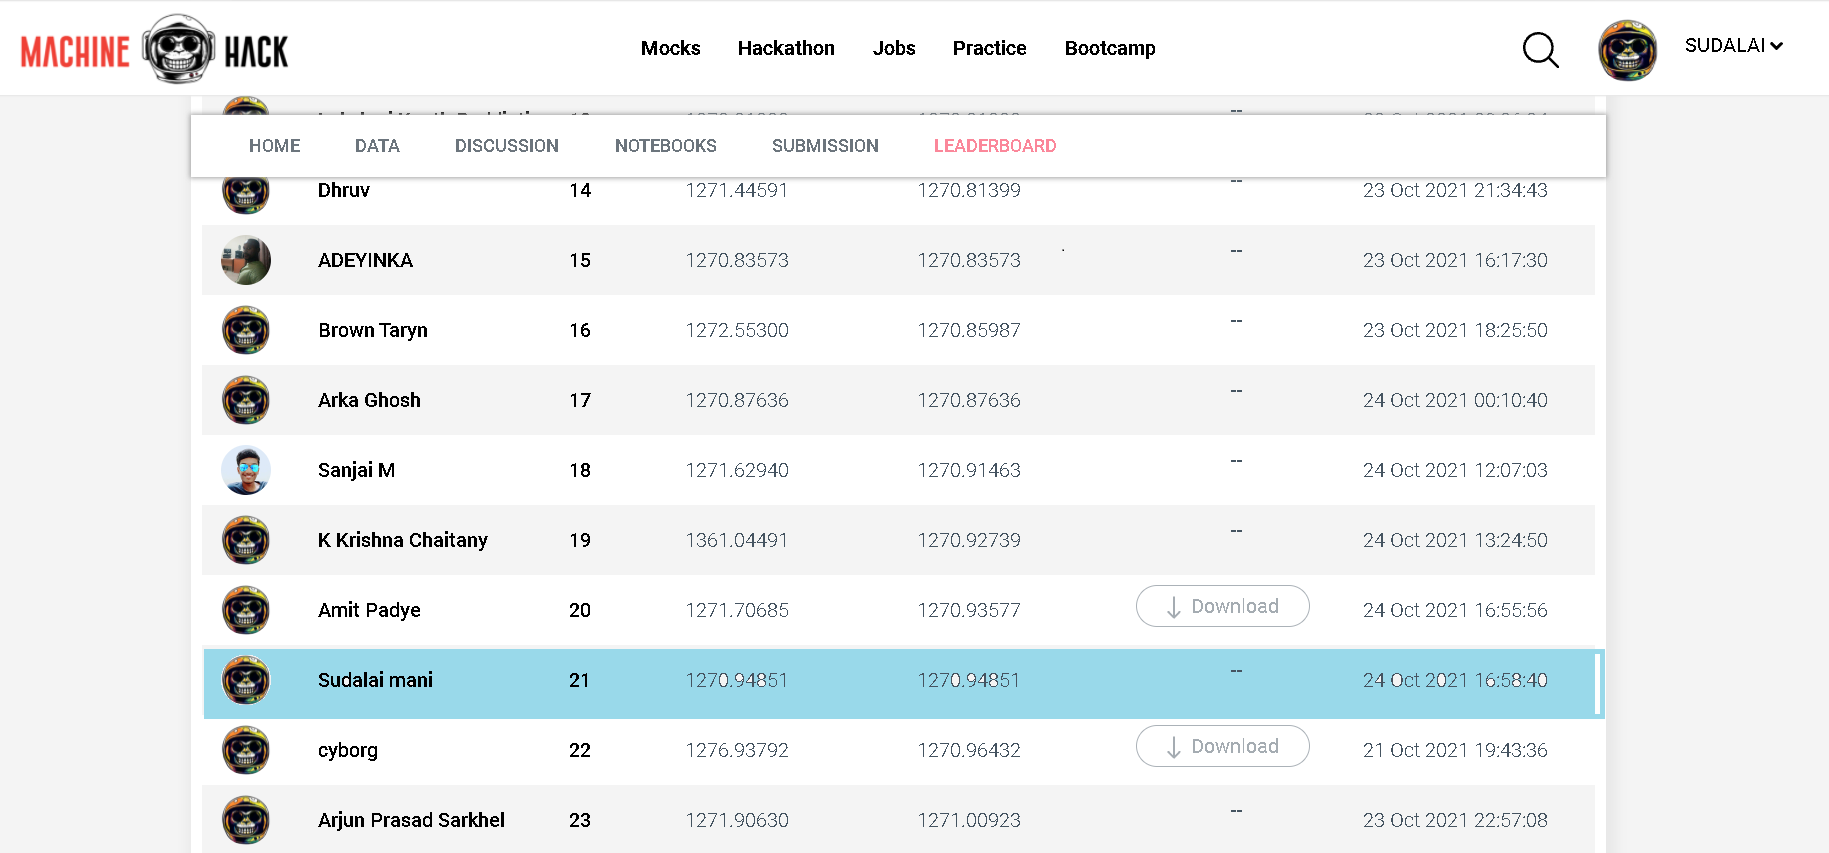

In [88]:
import os
from IPython.display import Image
Image(filename = "Retail_Sales_Model_Shivnadar_MachineHack_FinalResult.png", width=1000, height=1000)